# Why Workers Quit? 

dataset: IBM RH Analytics Employee Attrition & Performance

In this project, let's dig the data from kaggle and understand why workers leave their jobs.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# First Questions:

- Dataset structure
- There are missing data?
- Data types
- Target classes distribution 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


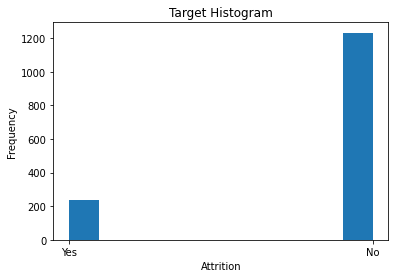

Yes Percentage: 16.122448979591837
No Percentage: 83.87755102040816


In [20]:
plt.hist(data.Attrition)
plt.title('Target Histogram')
plt.ylabel('Frequency')
plt.xlabel('Attrition')
plt.show()

yes = len(data[data['Attrition'] == 'Yes'])/len(data)
print(f'Yes Percentage: {yes*100}')

no = len(data[data['Attrition'] == 'No'])/len(data)
print(f'No Percentage: {no*100}')

- There are 1470 observations and 35 features. 
- None of the features has missing data.
- The data types are: integer and object.
- The target feature is imbalanced: 16% of "Yes" and 84% of "No".

# Gender Analysis

- What is the age distribution between females and males? Are there significant discrepancies?
- What is the average salary by gender? 
- What are the number of employees by gender in each department?
- What is the average job satisfaction by attrition class? There are significant differences?

             mean       std
              Age       Age
Gender                     
Female  37.329932  9.266083
Male    36.653061  9.042329


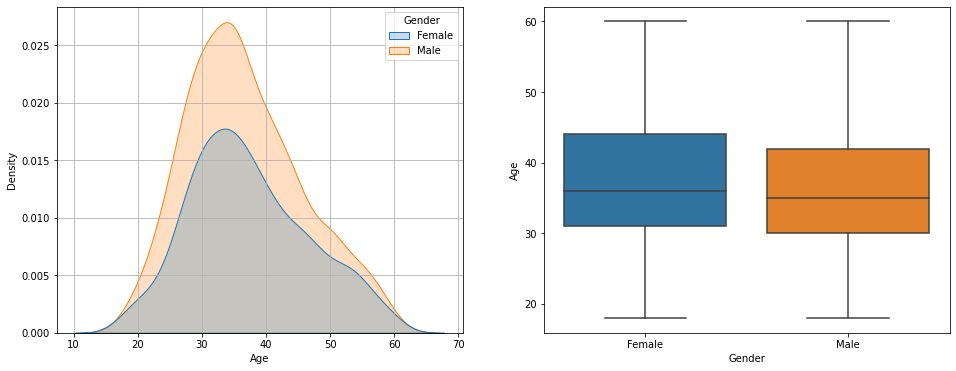

In [55]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill = True, hue=data['Gender'])
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(data['Gender'], data['Age'])

print(data.pivot_table(index='Gender', values='Age', aggfunc=[np.mean, np.std]))

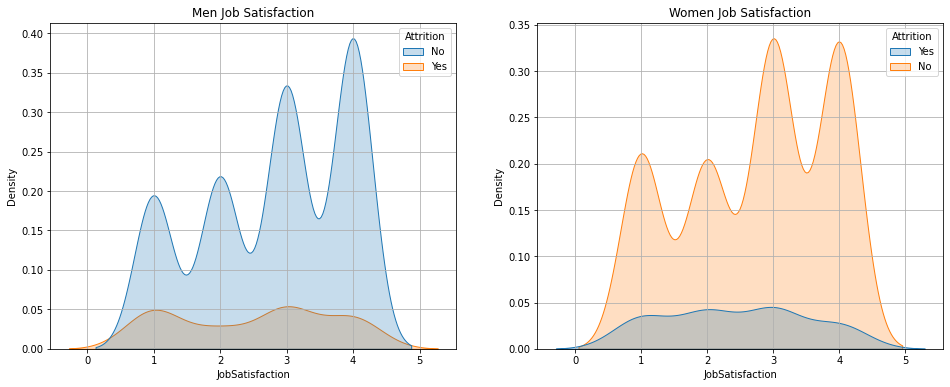

                            mean             std
                 JobSatisfaction JobSatisfaction
Gender Attrition                                
Female No               2.728543        1.098255
       Yes              2.425287        1.052485
Male   No               2.812842        1.089283
       Yes              2.493333        1.157100


In [58]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(data['JobSatisfaction'][data['Gender']=='Male'], hue=data['Attrition'][data['Gender']=='Male'], fill=True)
plt.grid()
plt.title('Men Job Satisfaction')
plt.subplot(1,2,2)
sns.kdeplot(data['JobSatisfaction'][data['Gender']=='Female'], hue=data['Attrition'][data['Gender']=='Female'], fill=True)
plt.grid()
plt.title('Women Job Satisfaction')
plt.show()

print(data.pivot_table(index=['Gender', 'Attrition'], values='JobSatisfaction', aggfunc=[np.mean, np.std]))

In [67]:
print('Men: ')
print(data[data['Gender']=='Male'].pivot_table(index='Department', values='Gender', aggfunc=len))

print('\nWomen: ')
print(data[data['Gender']=='Female'].pivot_table(index='Department', values='Gender', aggfunc=len))

Men: 
                        Gender
Department                    
Human Resources             43
Research & Development     582
Sales                      257

Women: 
                        Gender
Department                    
Human Resources             20
Research & Development     379
Sales                      189


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

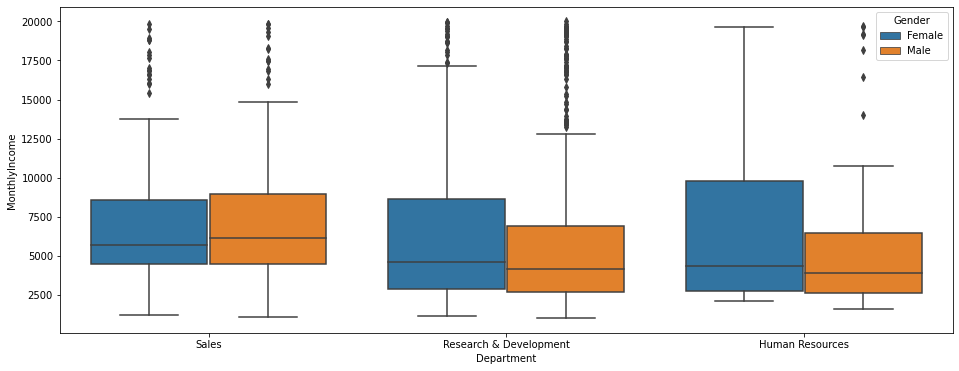

In [74]:
plt.figure(figsize=(16,6))

sns.boxplot(data['Department'], data['MonthlyIncome'], hue=data['Gender'])


<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

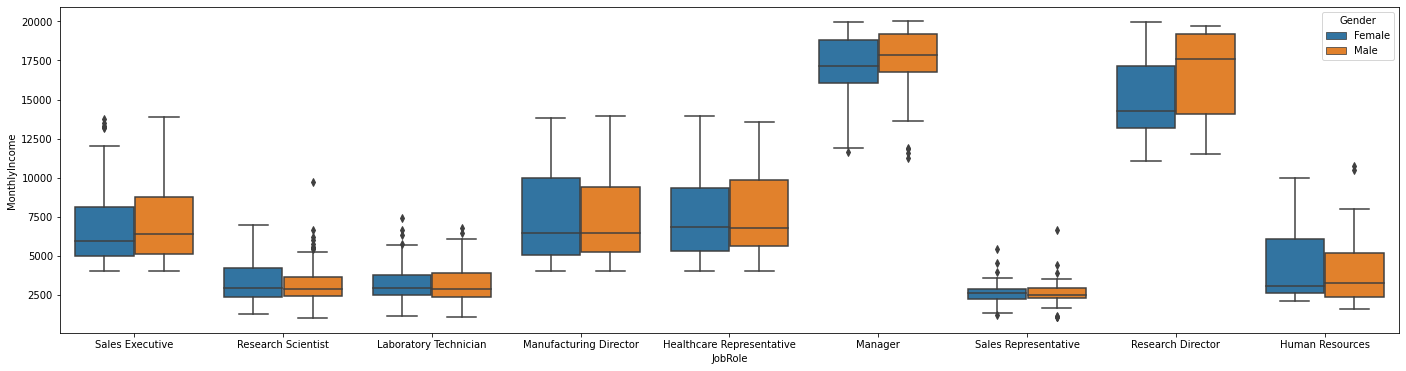

In [79]:
plt.figure(figsize=(24,6))

sns.boxplot(data['JobRole'], data['MonthlyIncome'], hue=data['Gender'])


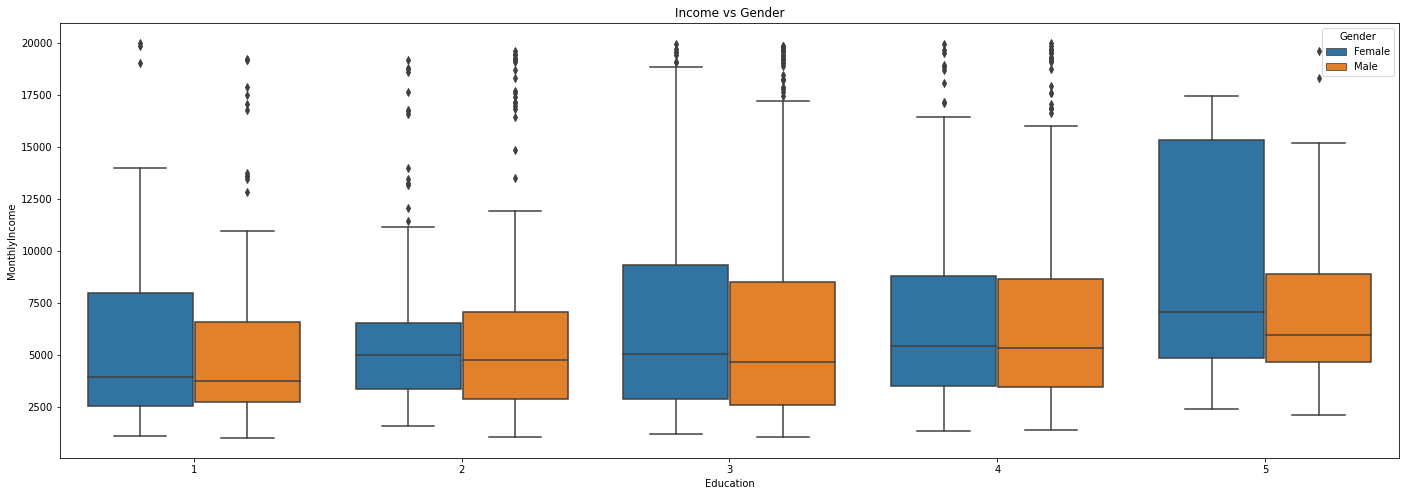

In [463]:
plt.figure(figsize=(24,8))

box_plot(data, 'Education', 'MonthlyIncome', 'Income vs Gender', hue=[1, 'Gender'])

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

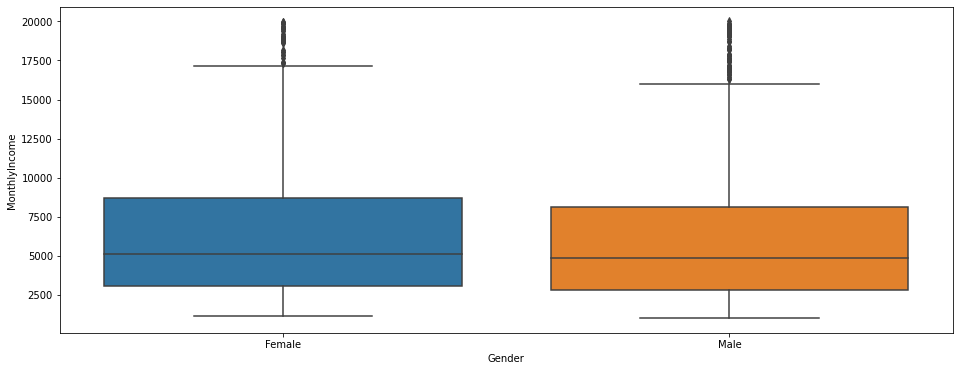

In [81]:
plt.figure(figsize=(16,6))

sns.boxplot(data['Gender'], data['MonthlyIncome'])

In [76]:
men_women = data.pivot_table(index=['Gender', 'JobRole'], values= 'MonthlyIncome', aggfunc=[np.mean, np.std]).reset_index()

men_women

,Gender,JobRole,mean,std
,,,MonthlyIncome,MonthlyIncome
0,Female,Healthcare Representative,7433.803922,2654.203090
1,Female,Human Resources,4540.687500,2810.885571
2,Female,Laboratory Technician,3246.905882,1165.993840
3,Female,Manager,16915.276596,2339.700052
4,Female,Manufacturing Director,7409.166667,2928.105488
5,Female,Research Director,15144.484848,2785.466648
6,Female,Research Scientist,3344.473684,1245.592557
7,Female,Sales Executive,6764.310606,2378.408911
8,Female,Sales Representative,2671.947368,776.651612


<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

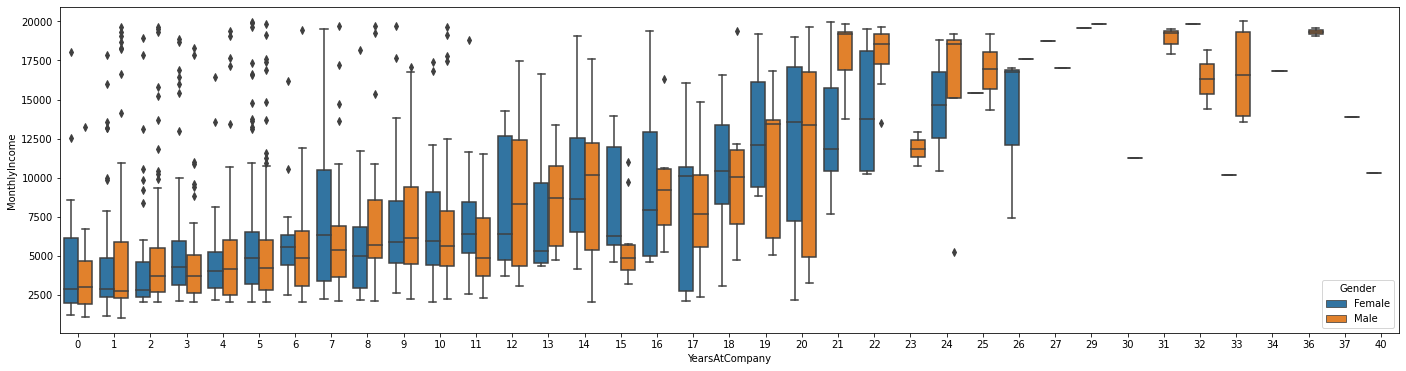

In [96]:
plt.figure(figsize=(24,6))
sns.boxplot(data['YearsAtCompany'],data['MonthlyIncome'], hue=data['Gender'])

Text(0, 0.5, '% Average Income Difference for Women ')

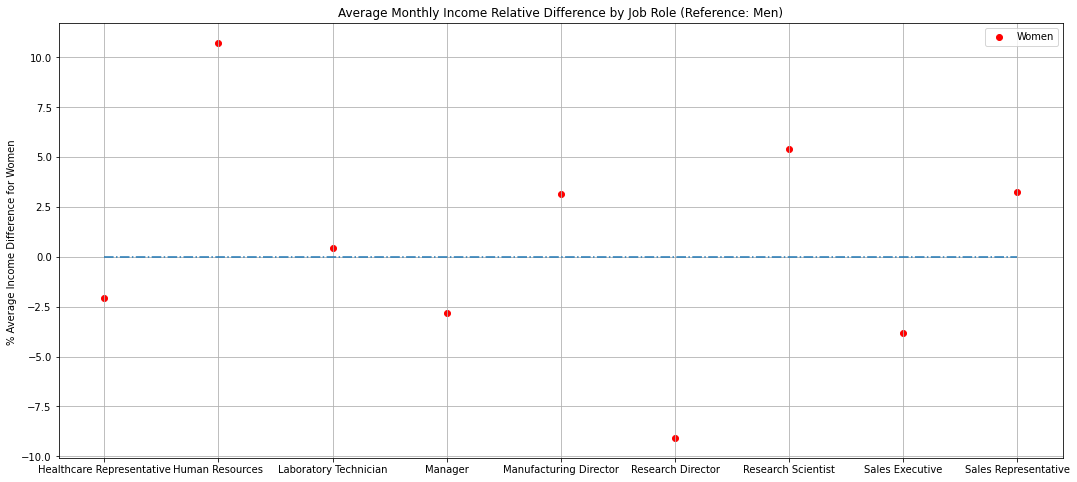

In [82]:
relative_dif = 100*(men_women[men_women['Gender']=='Female']['mean'].values - men_women[men_women['Gender']=='Male']['mean'].values)/ men_women[men_women['Gender']=='Male']['mean'].values
plt.figure(figsize=(18,8))
plt.scatter(men_women[men_women['Gender']=='Male']['JobRole'], relative_dif, color='red', label='Women')
plt.plot(np.arange(0,9,1),np.arange(0,9,1)*0, '-.')
plt.grid()
plt.title('Average Monthly Income Relative Difference by Job Role (Reference: Men)')
plt.legend()
plt.ylabel('% Average Income Difference for Women ')

Let's execute a statistical hypothesis test to check if there is siginificant difference between the average monthly income for each gender.

Shapiro P-value: 1.709933327621381e-30 
Shapiro P-value: 9.378564564919968e-24 


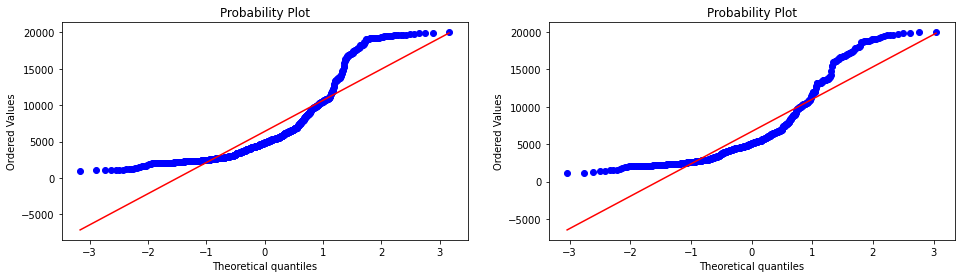

In [85]:
from visualization import check_normal


plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
men_income = data[data['Gender']=='Male']['MonthlyIncome'].values
check_normal(men_income)

plt.subplot(1,2,2)
women_income = data[data['Gender']=='Female']['MonthlyIncome'].values
check_normal(women_income)

The monthly income distributions aren't normal. So we will have to use the Mann-Whitney Hypothesis Test.  

- $H_0$ (Null Hypothesis): There aren't difference between the means (income) of each gender.

- $H_1$ (Alternative Hypothesis): There are difference between the means (income) of each gender.

In [86]:
import scipy.stats as stats
u, pVal = stats.mannwhitneyu(men_income,women_income)
print(pVal)

0.044208341633010594


As we can see from the plots above, apparently, there aren't significant differences between the incomes of each gender. The cases that have more contrast are: Human Resources (Women Income ~10% Higher) and Research Director (Women Income ~10% Lower). When we analize the p-value from the Mann-Whitney Hypothesis Test, we can see that it's very close to the threshold 0.05 (~ 0.045), indicating a more positive outcome for the $H_1$ hypothesis (but not so strong). These differences can be explained by the influence of other features such as: educational levels, years of experience of each gender and outliers. So, I'm concluding that there is no significant difference between the average income of women and men at this company.

In [464]:
data['Attrition'] = data['Attrition'].map({'No':0, 'Yes':1})

In [465]:
safe_data = data.copy()

numeric= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','TrainingTimesLastYear']

target = ['Attrition']

object = ['BusinessTravel', 'Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'WorkLifeBalance']

data_object = data[object].astype("category")

data_numeric = data[numeric].astype("float64")

frames = [data_numeric,pd.get_dummies(data_object)]

rh_data = pd.concat(frames,axis=1)

In [466]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rh_data, data[target], test_size=0.33, stratify=data[target])



In [467]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_data = scaler.fit_transform(x_train[numeric])

numeric_data_test = scaler.transform(x_test[numeric])

x_train[numeric] = numeric_data

x_test[numeric] = numeric_data_test

x_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction_4,StandardHours_80,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
977,0.380952,0.642090,0.892857,0.885714,0.051615,0.553976,0.111111,0.642857,0.125,0.125,...,0,1,0,0,0,1,0,0,1,0
44,0.285714,0.443092,0.000000,0.400000,0.156217,0.348755,0.111111,0.857143,0.300,0.300,...,1,1,1,0,0,0,0,0,1,0
1045,0.523810,0.568361,0.035714,0.542857,0.068292,0.238876,0.222222,0.214286,0.200,0.075,...,0,1,0,1,0,0,0,0,0,1
437,0.285714,0.222620,0.214286,0.385714,0.101963,0.654659,0.000000,0.214286,0.100,0.075,...,0,1,1,0,0,0,0,0,1,0
334,0.642857,0.319971,0.250000,0.642857,0.139645,0.288394,1.000000,0.214286,0.300,0.250,...,0,1,0,0,1,0,0,0,1,0


In [468]:
x_test.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction_4,StandardHours_80,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
1195,0.738095,0.506084,0.000000,0.085714,0.756175,0.814739,0.444444,0.214286,0.575,0.200,...,0,1,1,0,0,0,0,0,1,0
36,0.761905,0.549034,0.071429,0.800000,0.086130,0.068795,0.111111,0.214286,0.075,0.075,...,0,1,1,0,0,0,0,0,1,0
646,0.833333,0.548318,0.250000,0.614286,0.569189,0.831004,0.555556,0.214286,0.700,0.050,...,0,1,0,1,0,0,0,0,1,0
85,0.904762,0.929134,0.214286,0.271429,0.327686,0.787189,0.444444,0.000000,0.925,0.150,...,0,1,1,0,0,0,0,1,0,0
1053,0.928571,0.216893,0.000000,0.900000,0.203135,0.025060,0.000000,0.928571,0.325,0.300,...,0,1,0,1,0,0,0,1,0,0


In [469]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

rf_params = {
    'n_estimators': 1000,
    'max_features': 'auto',
    'max_depth': 4,
    'verbose': 0,
    'class_weight': 'balanced'
}


rf = RandomForestClassifier(**rf_params)

scores = cross_val_score(rf, x_train.values,y_train.values.reshape(-1), cv=skf, scoring='f1_macro')

print(scores)


[0.72292546 0.69059497 0.70151515 0.72808834 0.59765396]


In [470]:
rf.fit(x_train,y_train.values.reshape(-1))

y_pred = rf.predict(x_test)

print(classification_report(y_pred,y_test.values.reshape(-1)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       392
           1       0.50      0.41      0.45        94

    accuracy                           0.81       486
   macro avg       0.68      0.66      0.67       486
weighted avg       0.79      0.81      0.80       486



In [471]:
import dalex as dx

exp = dx.Explainer(rf, rh_data, data[target].values.reshape(-1))



Preparation of a new explainer is initiated

  -> data              : 1470 rows 80 cols
  -> target variable   : 1470 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002C7CCD1E1F0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.245, mean = 0.338, max = 0.618
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.509, mean = -0.177, max = 0.723
  -> model_info        : package sklearn

A new explainer has been created!


In [472]:
mp = exp.model_performance(model_type = 'classification')
mp.result

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.054852,0.928571,0.103586,0.846939,0.84894


In [473]:
mp.plot(geom="roc")